In [9]:
# 모듈 및 데이터 로드
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

data = load_breast_cancer()

# x, y 데이터 생성
X = data.data

# 악성을 1, 양성을 0으로
y = 1 - data.target

# 특징으로 사용할 데이터를 평균으로 구분하는 10개 열로 축소
X = X[:, :10]

# 로지스틱 회귀 모델 생성
model_lor = LogisticRegression(solver = 'lbfgs', max_iter=500)
model_lor.fit(X,y)
y_pred = model_lor.predict(X)

* 오차 행렬(혼동 행렬) 생성

In [12]:
# 종속 변수와 예측 결과로 혼동 행렬 생성
from sklearn.metrics import confusion_matrix

confusion_matrix(y, y_pred)

array([[337,  20],
       [ 30, 182]], dtype=int64)

* 정확도

In [15]:
from sklearn.metrics import accuracy_score
import pandas as pd

In [18]:
accuracy_score(y, y_pred)

0.9121265377855887

* 정밀도

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [19]:
precision_score(y, y_pred)

0.900990099009901

* 재현율

In [20]:
recall_score(y, y_pred)

0.8584905660377359

* F1 score

In [21]:
from sklearn.metrics import f1_score
f1_score(y, y_pred)

0.8792270531400966

* 예측 확률(pred_proba) : 0으로 예측할 확률이 0.1보다 크면 y_pred2 에 넣는다 가정.

In [22]:
from sklearn.preprocessing import Binarizer

In [23]:
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy, precision, recall))

In [28]:
# y과 y_pred2의 혼동행렬, 정확도, 정밀도, 재현율, f1 score 구하기
pred_proba = model_lor.predict_proba(X)

custom_threshold = 0.1

pred_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_1)
y_pred2 = binarizer.transform(pred_proba_1)

get_clf_eval(y, y_pred2)

오차 행렬
[[267  90]
 [  6 206]]
정확도: 0.8313, 정밀도: 0.6959, 재현율: 0.9717


* ROC 곡선 시각화

In [29]:
from sklearn.metrics import roc_curve

In [35]:
import matplotlib.pyplot as plt
import numpy as np

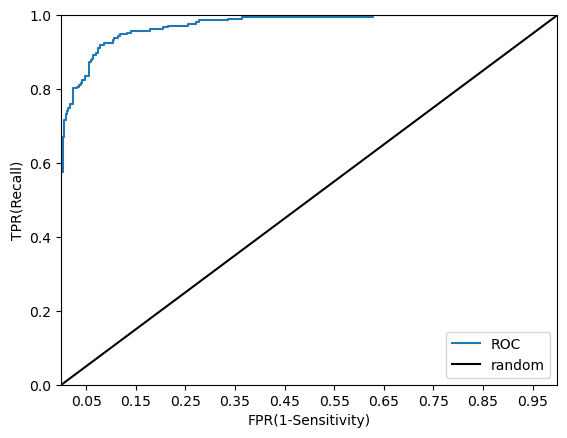

In [36]:
def roc_curve_plot(y_test, pred_proba_c1) :
    # 임곗값에 따른 FPR, TPR 값을 반환받음
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    # roc 곡선을 그래프 곡선으로 그림
    plt.plot(fprs, tprs, label='ROC')
    # 가운데 대각선 직선을 그림.
    plt.plot([0,1], [0,1], 'k-', label='random')
    # fpr x축의 scale을 0.1 단위로 변경, x,y축 명 설정 등
    start, end=plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR(1-Sensitivity)'); plt.ylabel('TPR(Recall)')
    plt.legend()
roc_curve_plot(y, pred_proba[:,1])

* ROC AUC 값

In [31]:
from sklearn.metrics import recall_score, f1_score, roc_auc_score

In [32]:
roc_auc_score(y, y_pred)

0.9012340785370753